In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_regression_functions
import custom_models
from custom_regression_functions import *
from custom_models_extended import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
from custom_models_fingerprints import *

In [4]:
use_fingerprints = False

apply_scaffold_split = True

create_new_data = True

In [5]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "GNN"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_regression_random_gnn_permute_val/model_gnn_conv"
    else:
        filename_basic = "results_regression_random_fp_permute_val/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_regression_scaffold_gnn_permute_val2/model_gnn_conv"
    else:
        filename_basic = "results_regression_scaffold_fp_permute_val2/model_gnn_conv"

apply_scaffold_split = False

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001

In [6]:
param_combinations = dict()

hidden_channels_list = [[256]]
linear_sizes_list = [[]]
gcn_layers_list = [4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

permute_layer_list = [[], [0,1,2,3]]
pre_act_permute_gcn_list = [False]
post_act_permute_gcn_list = [True]

#permute_index=permute_index, pre_act_permute_gcn=pre_act_permute_gcn, post_act_permute_gcn=post_act_permute_gcn


In [7]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list


#permute
param_combinations["permute_layer_list"] = permute_layer_list
param_combinations["pre_act_permute_gcn_list"] = pre_act_permute_gcn_list
param_combinations["post_act_permute_gcn_list"] = post_act_permute_gcn_list

In [8]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [9]:
batch_size = 64

In [10]:


if use_fingerprints:
    param_combinations_fp = dict()

    param_combinations_fp["radius"] = [2, 3]
    param_combinations_fp["fpSize"] = [1024, 2048]
    param_combinations_fp["linear_layers"] = [[2048], [2048, 1024, 512], [1024, 512], [1024]]
    param_combinations_fp["create_count_fp"] = [True, False]
    param_combinations_fp["apply_scaffold_split_list"] = apply_scaffold_split_list

    keys_fp = list(param_combinations_fp.keys())
    values_fp = list(param_combinations_fp.values())

    combinations_fp = list(itertools.product(*values_fp))


In [11]:
if use_fingerprints:

    combinations = combinations_fp
    keys = keys_fp
    values = values_fp

In [12]:
print(len(combinations))

6


In [13]:
#permute_index=[], pre_act_permute_gcn=False, post_act_permute_gcn=False

In [14]:
apply_scaffold_split = apply_scaffold_split


if create_new_data:
    data, data_y = load_esol()

    pytorch_graph_list = create_pytorch_graph(data)

    processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

    train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, test_percentage = 0.1, apply_scaffold_split = apply_scaffold_split )
    loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

else:

    import dill as pickle

    if apply_scaffold_split:
        loader_file = 'datasets_scaffold_reg_esol.pkl'
    else: 
        loader_file = 'datasets_reg_esol.pkl'
    with open(loader_file, 'rb') as file: 
        
        
        loaders = pickle.load(file) 
    
        print(loaders) 

    train_dataset, test_dataset, val_dataset = loaders

    '''
    if use_fingerprints:
        morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

        loader = DataLoader(morgan_data_train, 
                            batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(morgan_data_test, 
                                batch_size=batch_size, shuffle=True)

    else:
        #loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
    '''
    loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


run: 0
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000028CD6587B80>, <function global_max_pool at 0x0000028CD6580550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.649522797266642 | Validation Loss 5.75883674621582
Epoch 10 | Train Loss 3.329607280095418 | Validation Loss 4.07253110408783
Epoch 20 | Train Loss 2.6517877419789633 | Validation Loss 3.273093819618225
Epoch 30 | Train Loss 2.060837666193644 | Validation Loss 2.545522451400757
Epoch 40 | Train Loss 1.683444078763326 | Validation Loss 2.1543172001838684
Epoch 50 | Train Loss 1.4707157850265502 | Validation Loss 2.2989975214004517
Epoch 60 | Train Loss 1.2395477692286174 | Validation Loss 1.8920462727546692
Epoch 70 | Train Loss 1.173430625597636 | Validation Loss 1.8878090381622314
Epoch 80 | Train Loss 1.7333765586217245 | Validation Loss 1.8242529034614563
Epoch 90 | Train Loss 0.9972574591636658 | Validation Loss 1.2623732686042786
Epoch 100 | Train Loss 1.0194304545720418 | Validation Loss 1.1790868639945984
Epoch 110 | Train Loss 1.0612780054410298 | Validation Loss 1.2286068797111511
Epoch 120 | Train Loss 0.9113102952639262 | Validation Loss 1.081652432680

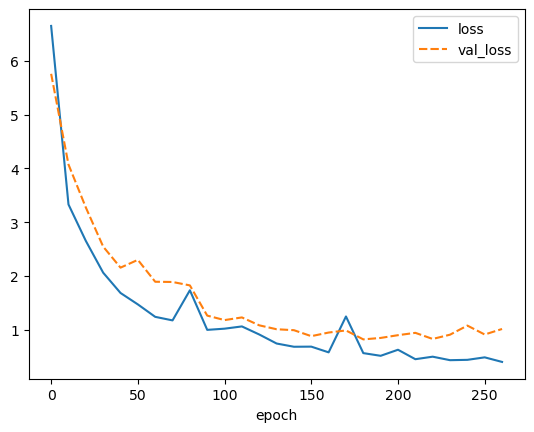

best weights loaded


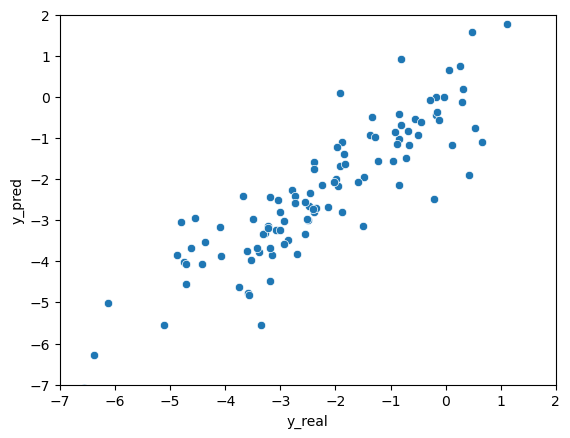

elapsed time: 65.2887659072876
run: 1
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000028CD6587B80>, <function global_max_pool at 0x0000028CD6580550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 11.402030245463054 | Validation Loss 8.937764644622803
Epoch 10 | Train Loss 4.446404027938843 | Validation Loss 5.387012720108032
Epoch 20 | Train Loss 4.563074858983358 | Validation Loss 4.706180930137634
Epoch 30 | Train Loss 4.4461465835571286 | Validation Loss 5.928086280822754
Epoch 40 | Train Loss 4.304700756072998 | Validation Loss 4.550127983093262
Epoch 50 | Train Loss 3.8281275828679404 | Validation Loss 4.750831604003906
Epoch 60 | Train Loss 3.9685685634613037 | Validation Loss 4.375831127166748
Epoch 70 | Train Loss 4.033069133758545 | Validation Loss 4.756244659423828
Epoch 80 | Train Loss 3.715750022729238 | Validation Loss 4.355669260025024
Epoch 90 | Train Loss 3.3594908237457277 | Validation Loss 4.537234783172607
Epoch 100 | Train Loss 3.088326660792033 | Validation Loss 3.9867509603500366
Epoch 110 | Train Loss 3.1809340635935466 | Validation Loss 4.049747705459595
Epoch 120 | Train Loss 3.0965813636779784 | Validation Loss 3.966613531112671
Ep

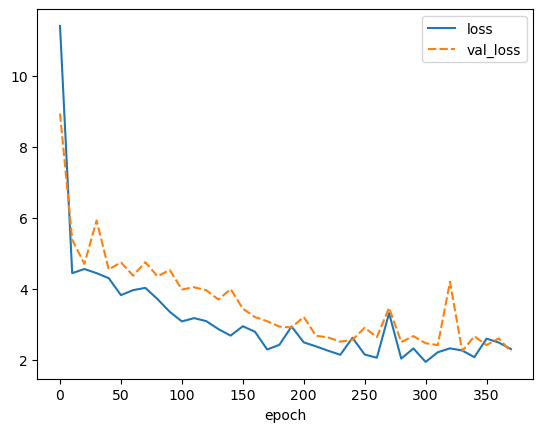

best weights loaded


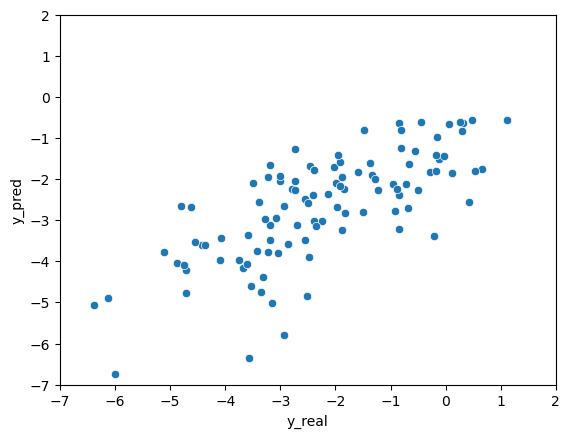

elapsed time: 124.81991672515869
run: 2
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000028CD6587B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 5.6121753295262655 | Validation Loss 5.160437345504761
Epoch 10 | Train Loss 3.851875321070353 | Validation Loss 4.553463459014893
Epoch 20 | Train Loss 2.6443825165430703 | Validation Loss 4.510121583938599
Epoch 30 | Train Loss 2.239503041903178 | Validation Loss 2.9945918321609497
Epoch 40 | Train Loss 1.6196199218432108 | Validation Loss 2.405018448829651
Epoch 

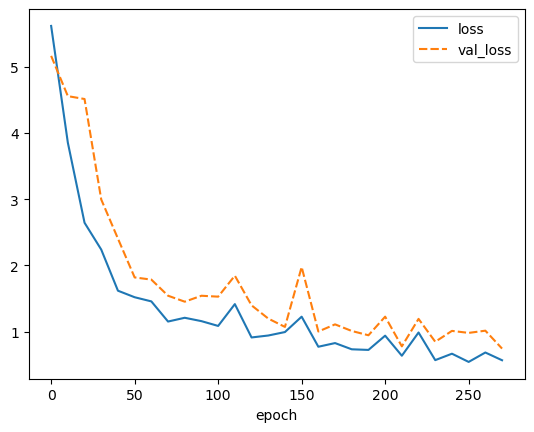

best weights loaded


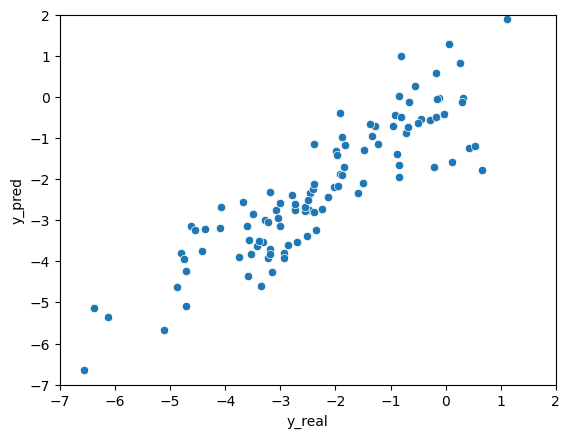

elapsed time: 66.83899879455566
run: 3
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000028CD6587B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 12.6216064453125 | Validation Loss 10.195030212402344
Epoch 10 | Train Loss 4.702100094159444 | Validation Loss 5.5627851486206055
Epoch 20 | Train Loss 4.301486968994141 | Validation Loss 5.012838125228882
Epoch 30 | Train Loss 4.374057579040527 | Validation Loss 4.809858798980713
Epoch 40 | Train Loss 3.9301000436147056 | Validation Loss 4.811444044113159

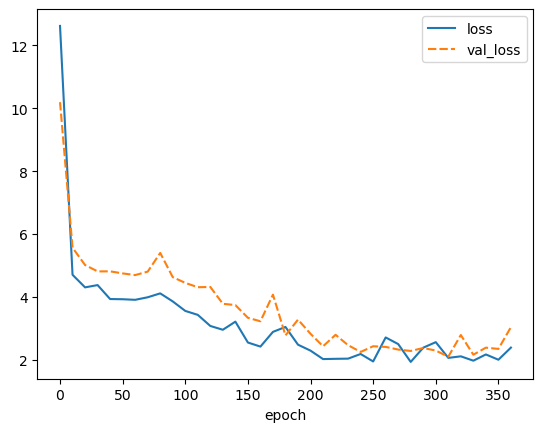

best weights loaded


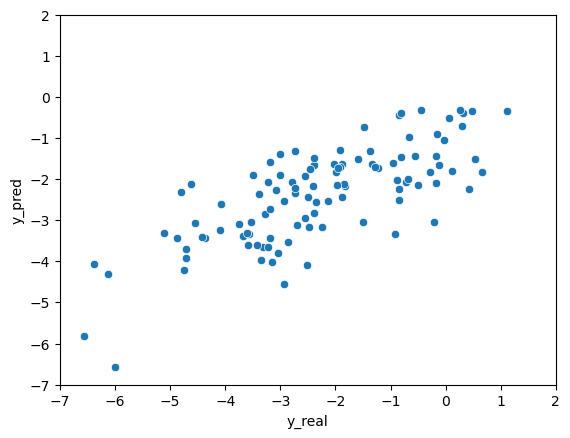

elapsed time: 123.26630115509033
run: 4
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000028CD6580550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.816501172383626 | Validation Loss 4.665682673454285
Epoch 10 | Train Loss 3.052757501602173 | Validation Loss 3.4907565116882324
Epoch 20 | Train Loss 2.209717361132304 | Validation Loss 2.6534799337387085
Epoch 30 | Train Loss 1.6663824558258056 | Validation Loss 2.0519078373908997
Epoch 40 | Train Loss 1.4112962404886882 | Validation Loss 1.8831153512001038
Epoch 50 | Train Loss 1.4594664653142293 | Validation Loss 1.6179293394088745
Epoch 60 | Train Loss 1.256310188770294 | Validation Loss 1.762408971786499
Epoch 70 | Train Loss 1.1829429030418397 | Validation Loss 1.4993003010749817
Epoch 80 | Train Loss 1.0030292471249898 | Validation Loss 1.5891221761703491
Epoch 90 | Train Loss 1.4530576507250468 | Validation Loss 1.5843979120254517
Epoch 100 | Train Loss 0.92373286485672 | Validation Loss 1.2508505582809448
Epoch 110 | Train Loss 0.8179611007372538 | Validation Loss 1.2609975934028625
Epoch 120 | Train Loss 0.8316907306512197 | Validation Loss 1.418410539

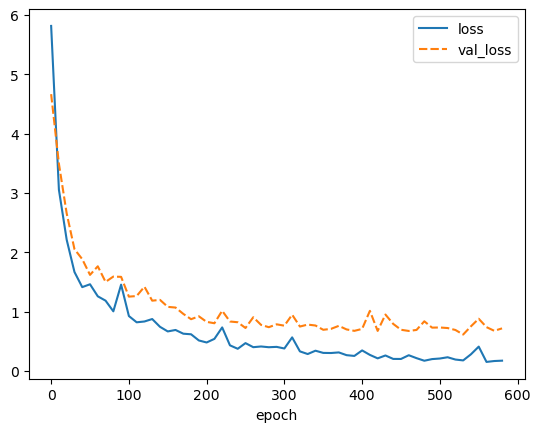

best weights loaded


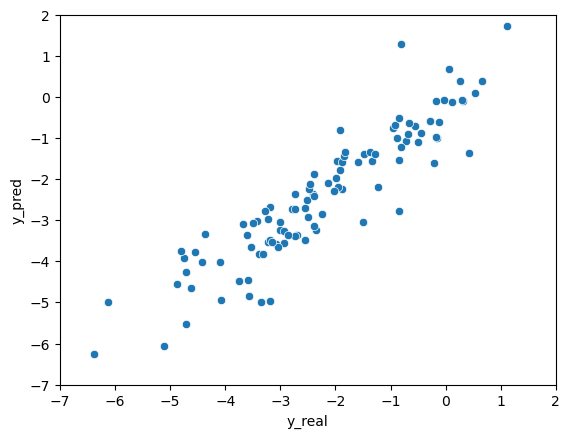

elapsed time: 132.8134195804596
run: 5
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000028CD6580550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 12.732037289937336 | Validation Loss 12.433969020843506
Epoch 10 | Train Loss 4.394387300809225 | Validation Loss 5.012577533721924
Epoch 20 | Train Loss 5.1519973119099935 | Validation Loss 5.491447448730469
Epoch 30 | Train Loss 4.603428570429484 | Validation Loss 4.604459047317505
Epoch 40 | Train Loss 3.863073380788167 | Validation Loss 4.62470269203186
Epoch 50 | Train Loss 3.8976856231689454 | Validation Loss 4.627705097198486
Epoch 60 | Train Loss 3.7785834471384683 | Validation Loss 4.597403526306152
Epoch 70 | Train Loss 3.9291213830312093 | Validation Loss 5.527834892272949
Epoch 80 | Train Loss 3.3708987474441527 | Validation Loss 4.374562978744507
Epoch 90 | Train Loss 4.275495831171671 | Validation Loss 4.532015800476074
Epoch 100 | Train Loss 3.3835702419281004 | Validation Loss 4.720480918884277
Epoch 110 | Train Loss 3.284192434946696 | Validation Loss 4.01149046421051
Epoch 120 | Train Loss 3.0123006025950114 | Validation Loss 3.939725637435913
Epo

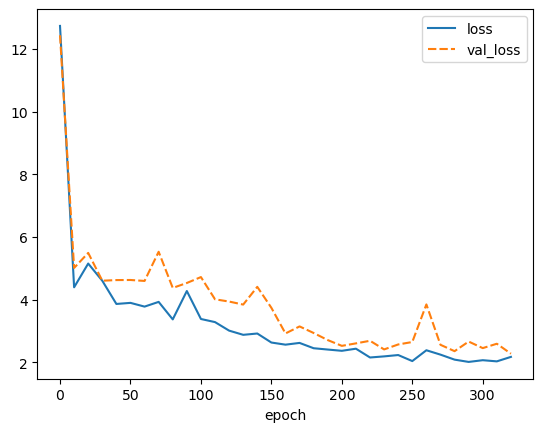

best weights loaded


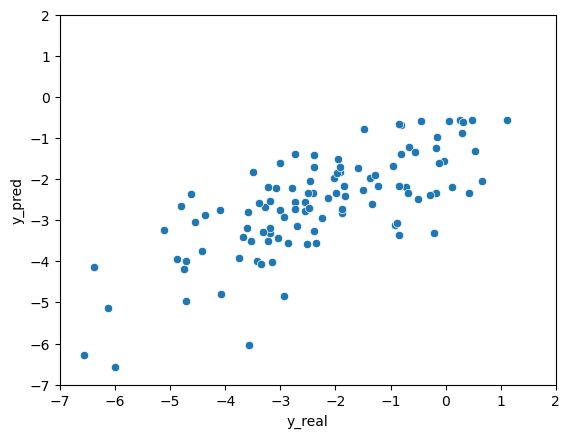

elapsed time: 100.80175352096558


In [15]:
import time

counter = 0
for combination in combinations:
    t0 = time.time()
    print(f"run: {counter}")
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])

        permute_index=combination_dict["permute_layer_list"]
        pre_act_permute_gcn=combination_dict["pre_act_permute_gcn_list"]
        post_act_permute_gcn=combination_dict["post_act_permute_gcn_list"]
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 




        

    if not use_fingerprints:
        model, device, optimizer, loss_fn = initialize_regression_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate, permute_index=permute_index, pre_act_permute_gcn=pre_act_permute_gcn, post_act_permute_gcn=post_act_permute_gcn)


        model, best_model_weights, losses, val_losses = regression_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression(model, test_loader, device, best_model_weights)

    else:

        model, device, optimizer, loss_fn = initialize_regression_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train_fingerprint(model, loader, val_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression_fingerprint(model, test_loader, device, best_model_weights)


    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")
    
    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #regression
    save_dict["mean_mse"] = mean_mse
    save_dict["mean_l1"] = mean_l1

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names

        save_dict["permute_index"] = permute_index
        save_dict["pre_act_permute_gcn"] = pre_act_permute_gcn
        save_dict["post_act_permute_gcn"] = post_act_permute_gcn


    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp



    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    